# Abstract Exploratory Data Analysis
#### (more organized)
##### Author: Haleigh Tomlin

Ask crystal about if it would be helpful to make a table, or how to best visualize the key terms by agency and such, or reporting on missingness.

Run this code in the morning with the larger dataset once I know it all works with the smaller!

In [3]:
#loading packages
import pandas as pd
import pickle
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import numpy as np
import seaborn as sb

In [4]:
#larger dataset

d = pd.read_pickle("../../data/dspg21RnD/smaller-final-dataset.pkl")

In [21]:
d.shape

(690814, 39)

In [9]:
d.head()

,original index,PROJECT_ID,ABSTRACT,FY,ORG_COUNT,PI_COUNT,nchar,final_frqwds_removed,PROJECT_TERMS,PROJECT_TITLE,...,ORGANIZATION_STATE,ORGANIZATION_ZIP,ORGANIZATION_COUNTRY,BUDGET_START_DATE,BUDGET_END_DATE,CFDA_CODE,FY.y,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS,PROJECT_START_YEAR
0,17608,152242,The multiprotein complex y-secretase proteolyt...,2008,1,1,1402,"[multiprotein, y_secretase, proteolytically_cl...",Active Sites; Affect; Alzheimer's Disease; Am...,STRUCTURE OF SIGNAL PEPTIDE PEPTIDASE,...,MA,021156110,UNITED STATES,12/1/2007,1/1/2008,93.866,2008,3483.0,NaN,2005
1,111864,190316,DESCRIPTION (provided by applicant): The Kis...,2008,1,1,2553,"[kissl, gene, encode, peptide, kisspeptin, bin...",Affect; Animal Model; Axon; Behavior; Behavio...,ROLE OF KISS1 NEURONS IN THE SEASONAL AND CIRC...,...,WA,981959472,UNITED STATES,9/1/2008,1/1/2009,93.865,2008,39175.0,NaN,2007
2,22052,154213,DESCRIPTION (provided by applicant): The objec...,2008,1,1,1414,"[biophysical, basis, thermodynamics_kinetic, m...",Agreement; Antibodies; base; Binding; Biochem...,CARBONIC ANHYDRASE AS A MODEL TO UNDERSTAND DI...,...,MA,021385319,UNITED STATES,1/2/2008,1/1/2009,93.859,2008,49646.0,NaN,2007
3,35004,159362,Obesity is the cause of many adverse pregnancy...,2008,1,1,1545,"[obesity, adverse_pregnancyoutcome, great, hea...",African; Analysis of Variance; Asians; Birth;...,OBESITY ON VAGAL TONE AND HBA1C DURING PREGNANCY,...,TX,770305400,UNITED STATES,4/1/2008,1/1/2009,93.361,2008,20406.0,NaN,2006
4,371628,594482,Local potato advisory groups have expressed in...,2010,1,1,271,"[local, potato, advisory, express, interest, m...",cost; Health; interest; Manure; Parasitic nem...,PLANT-PARASITIC NEMATODE MANAGEMENT AS A COMPO...,...,OR,97331,UNITED STATES,NaN,NaN,10.203,2010,NaN,NaN,2009


Checking for NA's for each variable, getting summary statistics for numeric variables. Making a few visualizations if possible.

In [14]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690814 entries, 0 to 690813
Data columns (total 32 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   original index              690814 non-null  int64  
 1   PROJECT_ID                  690814 non-null  object 
 2   ABSTRACT                    690814 non-null  object 
 3   FY                          690814 non-null  int64  
 4   ORG_COUNT                   690814 non-null  int64  
 5   PI_COUNT                    690814 non-null  int64  
 6   nchar                       690814 non-null  int64  
 7   final_frqwds_removed        690814 non-null  object 
 8   PROJECT_TERMS               677903 non-null  object 
 9   PROJECT_TITLE               690808 non-null  object 
 10  DEPARTMENT                  690808 non-null  object 
 11  AGENCY                      690808 non-null  object 
 12  IC_CENTER                   520577 non-null  object 
 13  PROJECT_NUMBER

In [10]:
d["FY"] = d.FY.astype(int)

In [19]:
d["FY_TOTAL_COST"] = d.FY_TOTAL_COST.astype(int)

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [8]:
d["PROJECT_START_YEAR"] = d["PROJECT_START_DATE"].str[-4:]

In [6]:
d["PROJECT_START_YEAR"] = d.PROJECT_START_YEAR.astype(int)

In [7]:
d["BUDGET_START_YEAR"] = d["BUDGET_START_DATE"].str[-4:]

###### Agency

In [23]:
d["AGENCY"].isna().sum()

0

In [24]:
np.unique(d["AGENCY"])

array(['ACF', 'AHRQ', 'ALLCDC', 'ARS', 'CCCRP', 'CDMRP', 'CNRM', 'DVBIC',
       'EPA', 'FDA', 'FS', 'IES', 'NASA', 'NIDILRR', 'NIFA', 'NIH', 'NSF',
       'VA'], dtype=object)

In [10]:
#bar chart: total cost by agency


TypeError: 'value' must be an instance of str or bytes, not a float

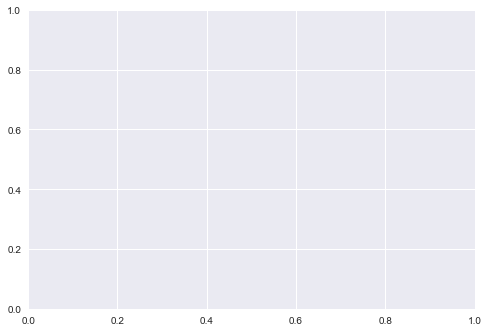

In [18]:
#Definitely give this one

plt.bar(d["AGENCY"], cost_agency) 
plt.xticks(rotation=70) 
plt.xlabel('Agency')  
plt.ylabel('Total Cost') 
plt.title('Total Project Cost by Agency') 
plt.savefig("agency_cost.png")

Commentary on 1st viz:

So, by far the agency that has spent the most on their projects has been the NIH, followed by the NSF.  It would be great if it said this was in USD, and note that it's in scientific notation

Outside the NIH and NSF, all the other agency projects sum to costs below 50,000,000.  


In [12]:
#bar chart: subproject cost by agency

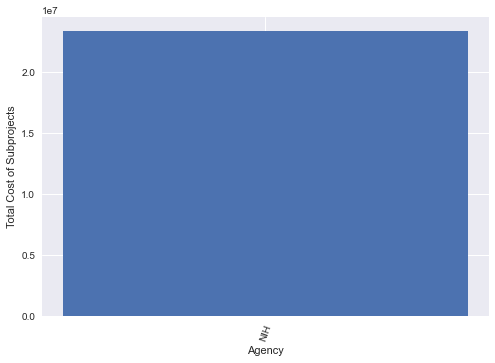

In [13]:
plt.bar(d["AGENCY"], d["FY_TOTAL_COST_SUB_PROJECTS"]) 
plt.xticks(rotation=70) 
plt.xlabel('Agency')  
plt.ylabel('Total Cost of Subprojects') 
plt.title('') 
plt.show();

In [14]:
#statistics on keyword lists by agency

In [25]:
d["PROJECT_ID"].groupby(d["AGENCY"]).count() # I want to see how many there are in NIH

AGENCY
ACF           283
AHRQ         2739
ALLCDC       3108
ARS          3950
CCCRP          22
CDMRP        7593
CNRM          131
DVBIC          99
EPA          1540
FDA          1558
FS            194
IES          1764
NASA        10853
NIDILRR       810
NIFA        25625
NIH        503298
NSF        121718
VA           5529
Name: PROJECT_ID, dtype: int64

In [26]:
display(d["PROJECT_ID"].groupby(d["AGENCY"]).count())

AGENCY
ACF           283
AHRQ         2739
ALLCDC       3108
ARS          3950
CCCRP          22
CDMRP        7593
CNRM          131
DVBIC          99
EPA          1540
FDA          1558
FS            194
IES          1764
NASA        10853
NIDILRR       810
NIFA        25625
NIH        503298
NSF        121718
VA           5529
Name: PROJECT_ID, dtype: int64

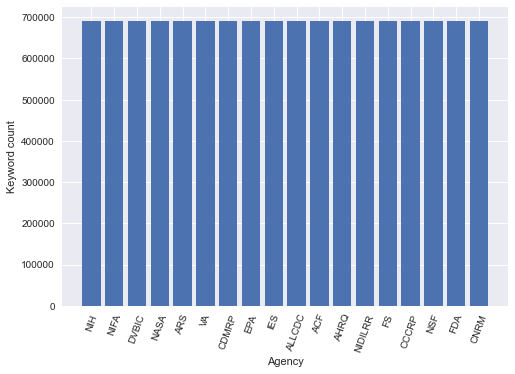

In [23]:
plt.bar(d["AGENCY"], d["AGENCY"].count("PROJECT_ID")) 
plt.xticks(rotation=70) 
plt.xlabel('Agency')  
plt.ylabel('Project count') 
plt.title('') 
plt.show();

In [49]:
table(d["PROJECT_ID"].groupby(d["DEPARTMENT"]).count())

NameError: name 'table' is not defined

###### Department

In [27]:
d["DEPARTMENT"].isna().sum()

0

In [28]:
np.unique(d["DEPARTMENT"])

array(['DOD', 'ED', 'EPA', 'HHS', 'NASA', 'NSF', 'USDA', 'VA'],
      dtype=object)

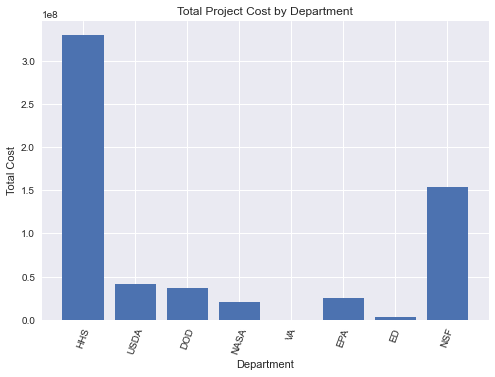

In [6]:
#keep this! it saved
#bar chart: total cost by department

plt.bar(d["DEPARTMENT"], d["FY_TOTAL_COST"]) 
plt.xticks(rotation=70) 
plt.xlabel('Department')  
plt.ylabel('Total Cost') 
plt.title('Total Project Cost by Department')
#plt.show();
plt.savefig("dep_cost.png")


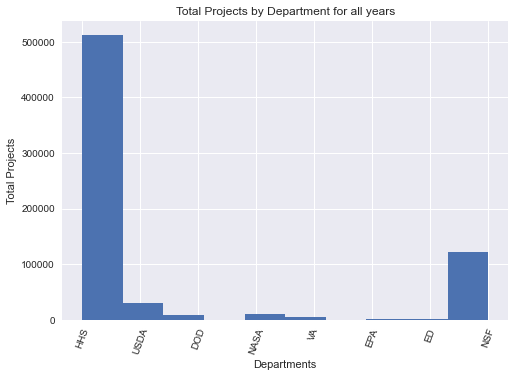

In [66]:

plt.hist(d["DEPARTMENT"]) 
plt.xticks(rotation=70) 
plt.xlabel('Departments')  
plt.ylabel('Total Projects') 
plt.title('Total Projects by Department for all years') 
plt.show()
#plt.savefig("proj_costs_fy.png") 

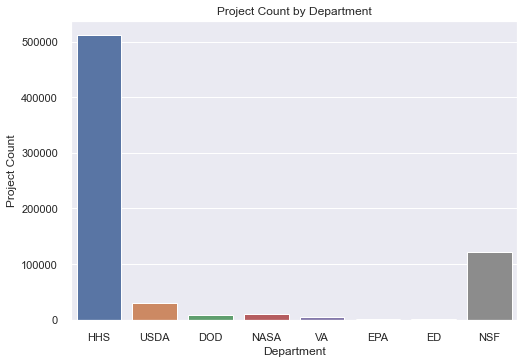

In [17]:
sb.set_theme(style = "darkgrid")
ax = sb.countplot(x = d["DEPARTMENT"])
ax.set(xlabel="Department", ylabel = "Project Count", title = "Project Count by Department")
plt.savefig("dep_projs.png") 

In [32]:
#statistics on keyword lists by department

count_dep = d["PROJECT_ID"].groupby(d["DEPARTMENT"]).count() 

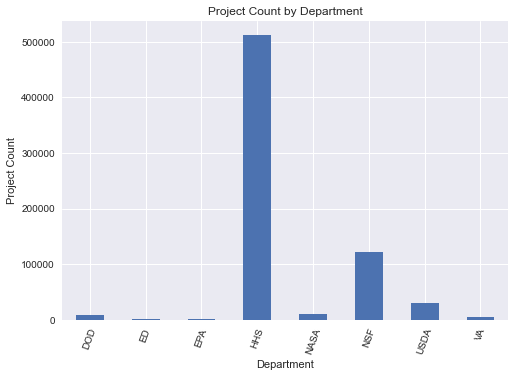

In [33]:
count_dep.plot(kind = "bar")
plt.xticks(rotation=70) 
plt.xlabel('Department')  
plt.ylabel('Project Count') 
plt.title('Project Count by Department') 
plt.savefig("count_dep.png")

###### Fiscal Year

In [30]:
d["FY"].isna().sum()

0

In [31]:
#bar charts here only.  Translate from last document

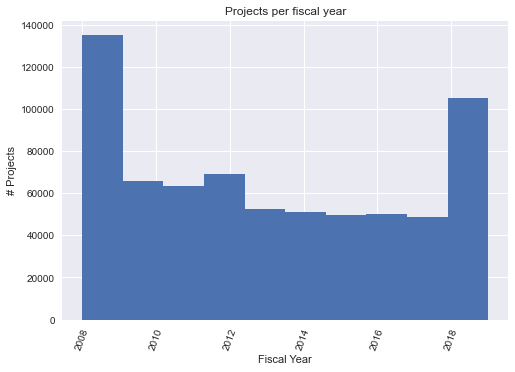

TypeError: savefig() missing 1 required positional argument: 'fname'

<Figure size 576x396 with 0 Axes>

In [62]:

#include this
plt.hist(d["FY"])
plt.xticks(rotation=70) 
plt.xlabel('Fiscal Year')  
plt.ylabel('# Projects') 
plt.title('Projects per fiscal year') 
#plt.show();
plt.savefig("proj_per_yr.png") 

In [58]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690814 entries, 0 to 690854
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   original index              690814 non-null  int64  
 1   PROJECT_ID                  690814 non-null  object 
 2   ABSTRACT                    690814 non-null  object 
 3   FY                          690814 non-null  object 
 4   PROJECT_TERMS               688920 non-null  object 
 5   PROJECT_TITLE               690814 non-null  object 
 6   DEPARTMENT                  690814 non-null  object 
 7   AGENCY                      690814 non-null  object 
 8   IC_CENTER                   289225 non-null  object 
 9   PROJECT_NUMBER              690814 non-null  object 
 10  PROJECT_START_DATE          690814 non-null  object 
 11  PROJECT_END_DATE            690814 non-null  object 
 12  CONTACT_PI_PROJECT_LEADER   690773 non-null  object 
 13  OTHER_PIS     

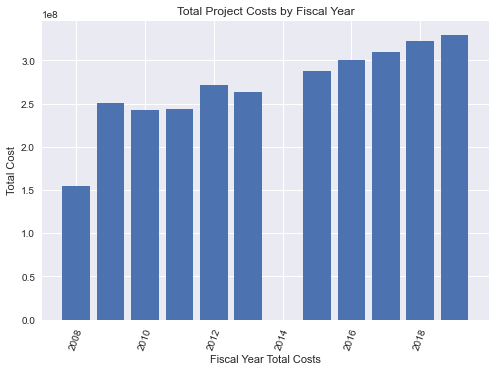

TypeError: savefig() missing 1 required positional argument: 'fname'

<Figure size 576x396 with 0 Axes>

In [63]:
#include this
d["FY"] = d.FY.astype(int)
plt.bar(d["FY"] , d["FY_TOTAL_COST"]) 
plt.xticks(rotation=70) 
plt.xlabel('Fiscal Year Total Costs')  
plt.ylabel('Total Cost') 
plt.title('Total Project Costs by Fiscal Year') 
plt.show()
plt.savefig("proj_costs_fy.png") 

###### Budget Start Year

###### Total Cost

In [29]:
d["FY_TOTAL_COST"].isna().sum()

217197

In [23]:
cost_agency = d["FY_TOTAL_COST"].groupby(d["AGENCY"]).sum()

In [24]:
cost_department = d["FY_TOTAL_COST"].groupby(d["DEPARTMENT"]).sum()

In [25]:
print(cost_department)

DEPARTMENT
DOD     6.796807e+09
ED      8.860165e+08
EPA     6.035817e+08
HHS     1.749744e+11
NASA    2.653579e+09
NSF     4.193927e+10
USDA    8.301113e+09
VA      0.000000e+00
Name: FY_TOTAL_COST, dtype: float64


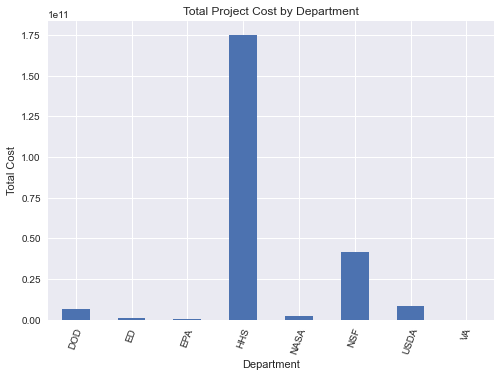

In [29]:
cost_department.plot(kind = "bar")
plt.xticks(rotation=70) 
plt.xlabel('Department')  
plt.ylabel('Total Cost') 
plt.title('Total Project Cost by Department') 
plt.savefig("dep_cost.png")

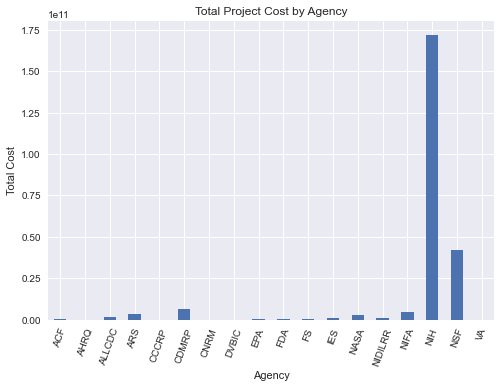

In [30]:
#Definitely give this one

cost_agency.plot(kind = "bar")
plt.xticks(rotation=70) 
plt.xlabel('Agency')  
plt.ylabel('Total Cost') 
plt.title('Total Project Cost by Agency') 
plt.savefig("agency_cost.png")

In [36]:
d["FY_TOTAL_COST"].summary() # or .info?

AttributeError: 'Series' object has no attribute 'summary'

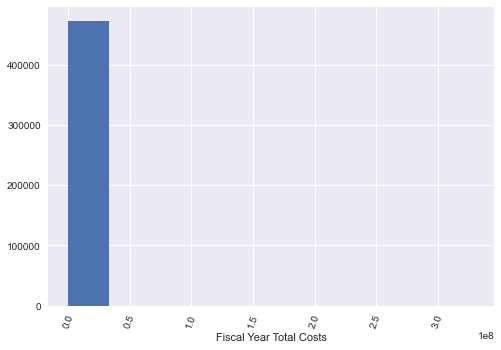

In [52]:
plt.hist(d["FY_TOTAL_COST"]) 
plt.xticks(rotation=70) 
plt.xlabel('Fiscal Year Total Costs') 
plt.title('') 
plt.show();

###### Subproject Cost

In [32]:
d["FY_TOTAL_COST_SUB_PROJECTS"].isna().sum()

629351

In [33]:
d["FY_TOTAL_COST_SUB_PROJECTS"].isna().groupby(d["AGENCY"]).sum()

AGENCY
ACF           283
AHRQ         2739
ALLCDC       3108
ARS          3950
CCCRP          22
CDMRP        7593
CNRM          131
DVBIC          99
EPA          1540
FDA          1558
FS            194
IES          1764
NASA        10853
NIDILRR       810
NIFA        25625
NIH        441835
NSF        121718
VA           5529
Name: FY_TOTAL_COST_SUB_PROJECTS, dtype: int64

In [34]:
d["FY_TOTAL_COST_SUB_PROJECTS"].isna().groupby(d["DEPARTMENT"]).sum()

DEPARTMENT
DOD       7845
ED        1764
EPA       1540
HHS     450333
NASA     10853
NSF     121718
USDA     29769
VA        5529
Name: FY_TOTAL_COST_SUB_PROJECTS, dtype: int64

In [ ]:
d["FY_TOTAL_COST_SUB_PROJECTS"].summary() #.info?

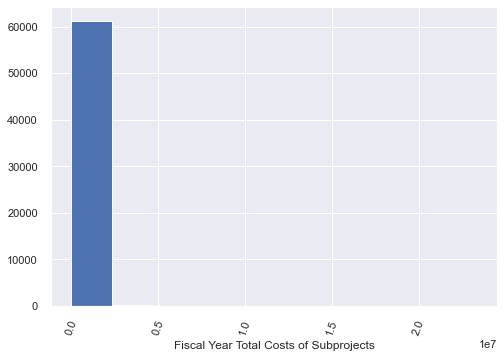

In [35]:
plt.hist(d["FY_TOTAL_COST_SUB_PROJECTS"]) 
plt.xticks(rotation=70) 
plt.xlabel('Fiscal Year Total Costs of Subprojects') 
plt.title('') 
plt.show();

###### Keyterms

In [36]:
d["PROJECT_TERMS"].isna().sum()

1894

In [37]:
d["PROJECT_TERMS"].isna().groupby(d["AGENCY"]).sum()

AGENCY
ACF           0
AHRQ          0
ALLCDC        0
ARS           0
CCCRP         0
CDMRP         0
CNRM          0
DVBIC         0
EPA           0
FDA           0
FS            0
IES           0
NASA          5
NIDILRR       0
NIFA          0
NIH        1889
NSF           0
VA            0
Name: PROJECT_TERMS, dtype: int64

In [38]:
d["FY_TOTAL_COST"].mean()

462816.6004936478

In [39]:
d["FY_TOTAL_COST"].max()

329574691.0

In [40]:
d["FY_TOTAL_COST"].min()

1.0

In [ ]:
also do a dist of total cost?

In [41]:
d["FY"].unique()

array(['2008', '2010', '2009', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019'], dtype=object)

In [ ]:
d["FY_TOTAL_COST"].groupby(d["FY"]).count()

In [45]:
d["FY_TOTAL_COST"].groupby(d["FY"]).count()

FY
2008    43727
2009    49050
2010    46636
2011    45493
2012    57259
2013    39436
2014       55
2015    36456
2016    37579
2017    37651
2018    38371
2019    41904
Name: FY_TOTAL_COST, dtype: int64

In [46]:
d["FY_TOTAL_COST"].isna().groupby(d["FY"]).sum()

FY
2008    21887
2009    20560
2010    18962
2011    17983
2012    11911
2013    12934
2014    51140
2015    12992
2016    12373
2017    11269
2018    11974
2019    13212
Name: FY_TOTAL_COST, dtype: int64